# Tugas Kecil 1 Machine Learning
Dataset table tennis<br>
Jon Felix Germinian - 13518025<br>
Filbert Wijaya - 13518077

## Import semua library yang diperlukan

agak banyak library yang diminta, dimaklumin

In [45]:
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics

## Import dataset yang digunakan

In [46]:
# dataset play tennis external?
play_tennis = pd.read_csv('PlayTennis.csv')

## Make dataframe for given dataset

In [47]:
df_play_tennis = pd.DataFrame(play_tennis)
df_play_tennis.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [48]:
df_play_tennis.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis'], dtype='object')

## Feature engineering
umm.. apa yang mau dicari?

In [49]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_play_tennis['Outlook_'] = lb.fit_transform(df_play_tennis['Outlook']) 
df_play_tennis['Temperature_'] = lb.fit_transform(df_play_tennis['Temperature'] ) 
df_play_tennis['Humidity_'] = lb.fit_transform(df_play_tennis['Humidity'] ) 
df_play_tennis['Wind_'] = lb.fit_transform(df_play_tennis['Wind'] )   
df_play_tennis['Play Tennis_'] = lb.fit_transform(df_play_tennis['Play Tennis'] ) 
x = df_play_tennis.iloc[:,5:9] 
y = df_play_tennis.iloc[:,9]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=0)

## Training
### Decision Tree

[Text(111.60000000000001, 199.32, 'X[0] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(55.800000000000004, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 1.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(111.60000000000001, 126.83999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(223.20000000000002, 126.83999999999999, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(167.4, 90.6, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(111.60000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 54.359999999999985, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(279.0, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

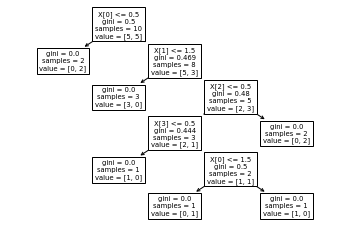

In [50]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)
tree.plot_tree(clf1) 

In [51]:
print("Training set score: %f" % clf1.score(X_train, y_train))
print("Test set score: %f" % clf1.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.500000


In [52]:
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, clf1.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, clf1.predict(X_test),average='weighted'))

Accuracy score: 0.500000
F1 Score : 0.666667


### Id3Estimator

In [53]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [54]:
import id3
estimator = id3.Id3Estimator()
estimator = estimator.fit(x, y)
tree = id3.export_graphviz(estimator.tree_, 'tree1.dot', df_play_tennis.columns)
# file dot bisa dibuka pake graphviz

In [55]:
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, estimator.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, estimator.predict(X_test),average='weighted'))

Accuracy score: 1.000000
F1 Score : 1.000000


### KMeans

In [56]:
from sklearn.cluster import KMeans
mapping = {'Sunny': 1, 'Overcast' : 0, 'Rain' : -1,
            'Hot': 1, 'Mild' : 0, 'Cool' : -1,
            'High': 1, 'Normal' : 0,
            'Strong': 1, 'Weak' : 0,
            'Yes': 1, 'No' : 0}
df_play_tennis_kmeans = df_play_tennis.replace({'Outlook':mapping,'Temperature':mapping,'Humidity':mapping,'Wind':mapping,'Play Tennis':mapping})
x1 = df_play_tennis_kmeans.iloc[:,5:9]
y1 = df_play_tennis_kmeans.iloc[:,9]
X_train1, X_test1, y_train1, y_test1 = sklearn.model_selection.train_test_split(x1, y1, random_state=0)
kmeans = KMeans(n_clusters=2).fit(x1)

centroids = kmeans.cluster_centers_
print(centroids)

[[1.57142857 1.71428571 0.28571429 0.57142857]
 [0.33333333 0.66666667 0.66666667 0.66666667]]


In [57]:


print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test1, kmeans.predict(X_test1)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test1, kmeans.predict(X_test1),average='weighted'))

Accuracy score: 1.000000
F1 Score : 1.000000


### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression(random_state=0).fit(X_train, y_train)

In [59]:
print("Training set score: %f" % clf3.score(X_train, y_train))
print("Test set score: %f" % clf3.score(X_test, y_test))

Training set score: 0.900000
Test set score: 0.500000


In [60]:
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, clf3.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, clf3.predict(X_test),average='weighted'))

Accuracy score: 0.500000
F1 Score : 0.666667


### Neural Network

In [61]:
from sklearn.neural_network import MLPClassifier
clf4 = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [62]:
print("Training set score: %f" % clf4.score(X_train, y_train))
print("Test set score: %f" % clf4.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.500000


In [63]:
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, clf4.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, clf4.predict(X_test),average='weighted'))

Accuracy score: 0.500000
F1 Score : 0.666667


### SVM

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf5 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf5.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [65]:
print("Training set score: %f" % clf5.score(X_train, y_train))
print("Test set score: %f" % clf5.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.000000


In [66]:
print("Accuracy score: %f" % sklearn.metrics.accuracy_score(y_test, clf5.predict(X_test)))
print("F1 Score : %f" % sklearn.metrics.f1_score(y_test, clf5.predict(X_test),average='weighted'))

Accuracy score: 0.000000
F1 Score : 0.000000
